# knn algorithm
### 변수
1. 범주형 변수
    - 근처 k개 중에 가장 많은 범주를 선택하여 해당 값을 가짐
    - Hamming distance로 거리 구함 (수식은 이미지로 못 넣었음ㅠㅜ 귀찮지만 찾아보기...)
2. 연속형 변수
    - 근처 k개의 평균을 선택
    - 유클리드 또는 맨해튼으로 거리 구함
    


[출처](https://blog.naver.com/tjdtjdgus99/222184613121)

### knn에서 발생하는 문제 -> 과적합
- 모델이 너무 복잡하거나 너무 단순하지 않도록 적절한 k값 필요
- Cross_Validation

In [2]:
from preamble import*
%matplotlib inline

In [3]:
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap

In [5]:
iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target

In [6]:
# 이웃의 수 = 5 & 학습
clf = neighbors.KNeighborsClassifier(5)
clf.fit(X,y)

KNeighborsClassifier()

In [7]:
y_pred = clf.predict(X)

In [8]:
from sklearn.metrics import confusion_matrix

In [9]:
confusion_matrix(y,y_pred)

array([[49,  1,  0],
       [ 0, 38, 12],
       [ 0, 12, 38]], dtype=int64)

In [10]:
# cross-validation
from sklearn.model_selection import cross_val_score

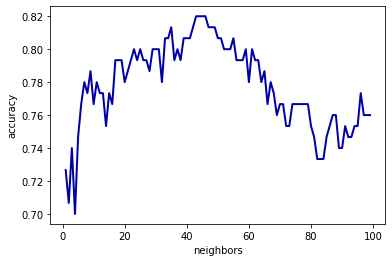

In [13]:
k_range = range(1,100)
k_score = []

# k를 1부터 100까지 바꾸면서 정확도 측정
for k in k_range:
    knn = neighbors.KNeighborsClassifier(k)
    scores = cross_val_score(knn,X,y,cv=10,scoring="accuracy")
    k_score.append(scores.mean())
plt.plot(k_range,k_score)
plt.xlabel("neighbors")
plt.ylabel("accuracy")
plt.show()

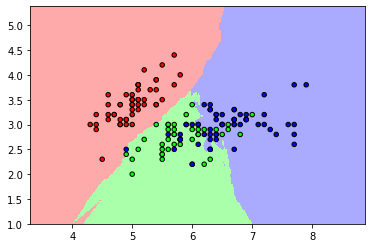

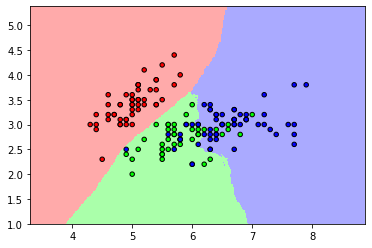

In [24]:
n_neighbors = 40
h = .02 #step size in the mesh

cmap_light = ListedColormap(['#FFAAAA','#AAFFAA','#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000','#00FF00','#0000FF'])

# 거리에 가중치를 주지 않는 버전을 uniform 버전이라고 하고 가중치를 주는 버전을 distance 버전
for weights in ['uniform','distance']:
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights = weights)
    clf.fit(X,y)
    
    # plot의 boundary 설정
    # point in the mesh [xmin, xmax][ymin,ymax]
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min,y_max,h))
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    
    # put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx,yy,Z,cmap=cmap_light)
    
    # plot also the training points
    plt.scatter(X[:,0],X[:,1],c=y,cmap=cmap_bold, edgecolor = 'k', s=20)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())
plt.show()